In [14]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

def parse_spike_file(filename):
    with open(filename, 'r') as file:
        # Read lines and split them into lists of floats
        data = [list(map(float, line.strip().split())) for line in file if line.strip()]
    
    # Convert the list of lists into a numpy array
    spike_array=data
    return spike_array

spks=parse_spike_file('../crcns-student/data/l2a_avg/conspecific/spike1')

In [11]:
import numpy as np

def bin_spike_times(spike_array, bin_size_ms=10):
    # Flatten all spike times to find the max time
    max_time = 2000
    
    # Calculate the bin edges from 0 to max_time with the specified bin size
    bins = np.arange(0, max_time + bin_size_ms, bin_size_ms)
    
    # Initialize an array to store the binned counts (rows = neurons, columns = bins)
    binned_spike_counts = np.zeros((10, len(bins) - 1), dtype=int)
    
    # Bin the spike times for each neuron
    for i, spikes in enumerate(spike_array):
        # Use np.histogram to count the number of spikes in each bin
        binned_spike_counts[i], _ = np.histogram(spikes, bins=bins)
    
    return binned_spike_counts, bins

binned, bins = bin_spike_times(spks, bin_size_ms=100)

In [12]:
binned

array([[2, 0, 1, 0, 2, 1, 0, 2, 1, 3, 3, 0, 0, 1, 2, 1, 0, 0, 0, 0],
       [3, 1, 2, 1, 2, 0, 0, 4, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0],
       [1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 2, 2, 1, 3, 0, 0, 0, 0],
       [3, 4, 4, 3, 1, 1, 0, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 0, 0],
       [2, 1, 0, 0, 1, 1, 1, 0, 1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [10]:
binned.shape

(10, 200)

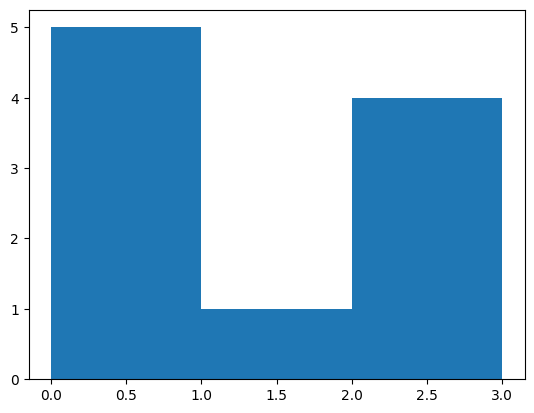

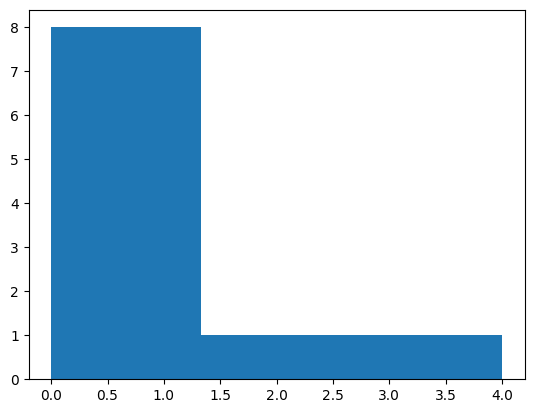

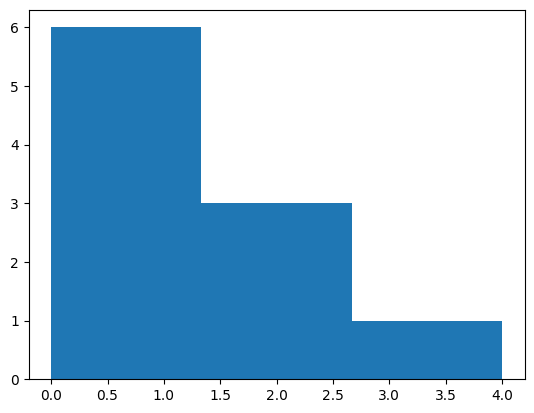

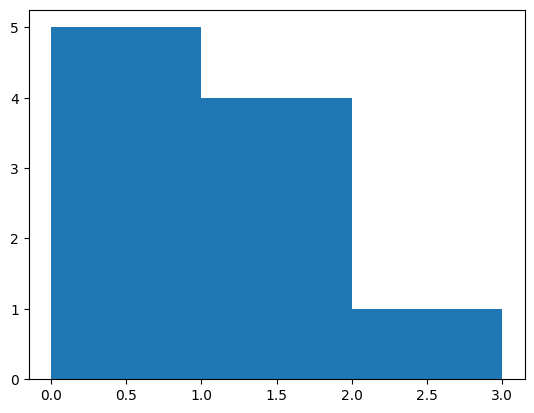

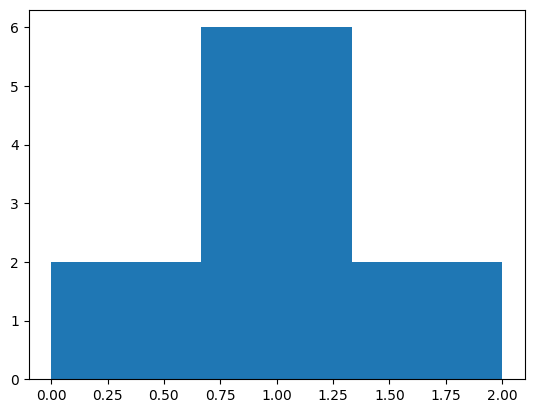

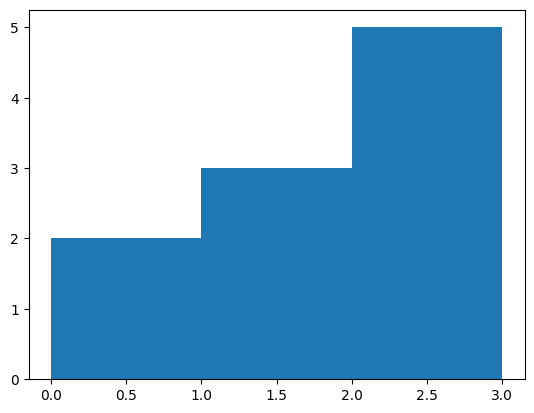

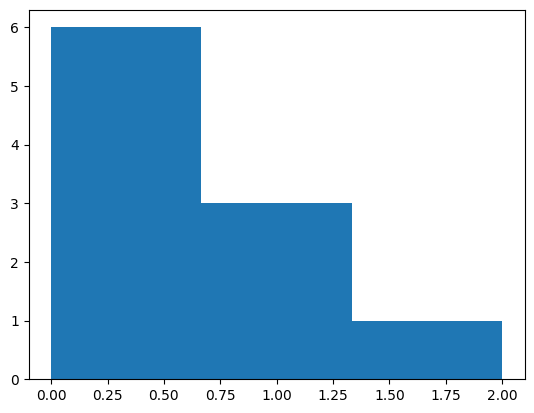

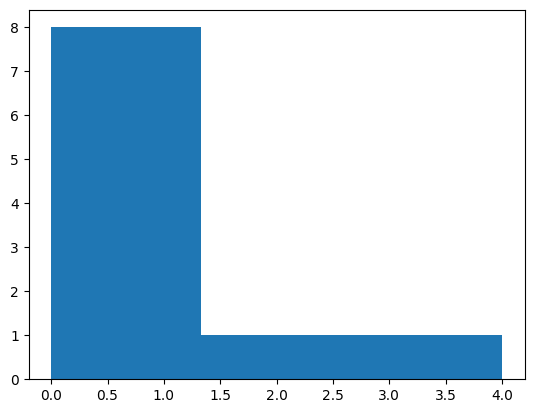

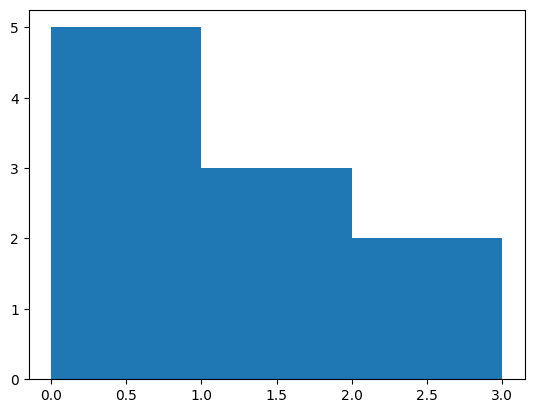

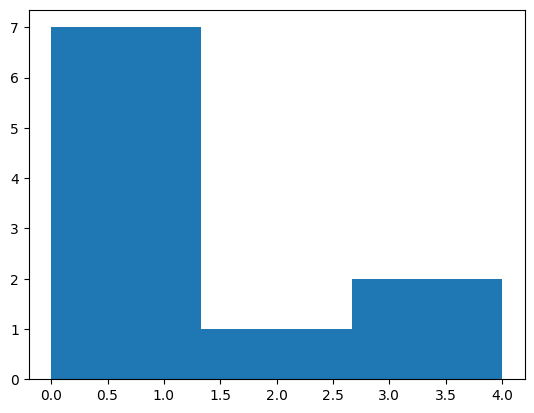

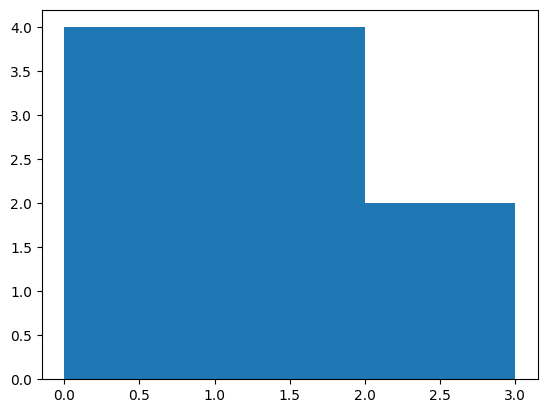

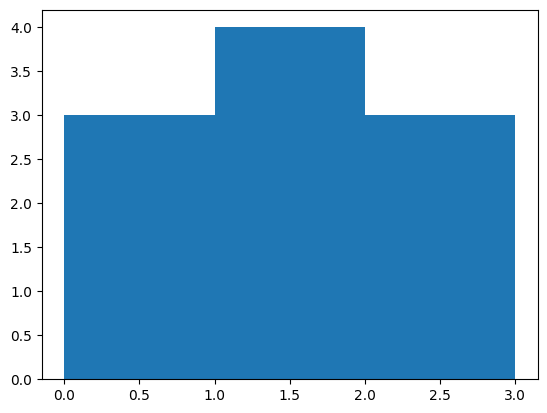

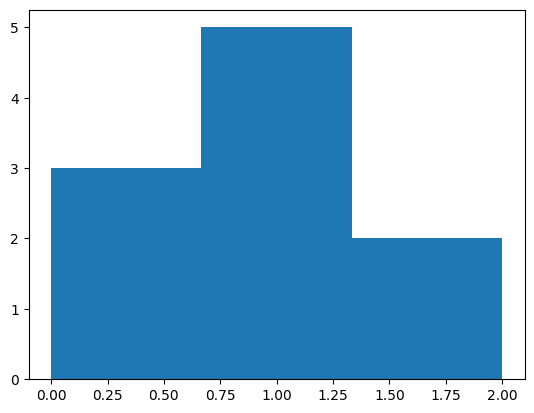

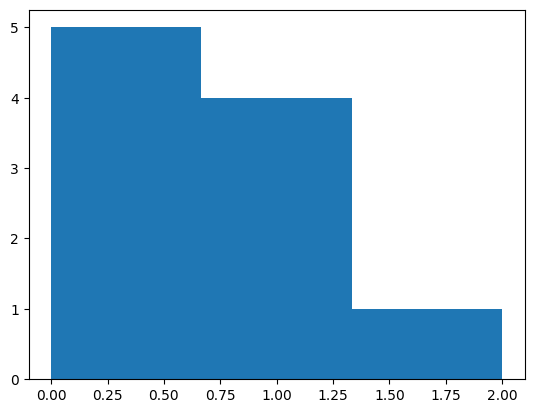

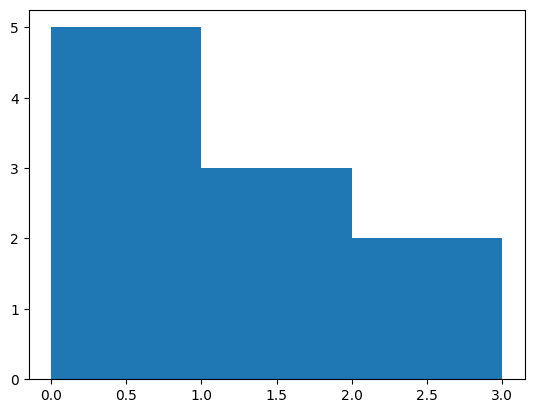

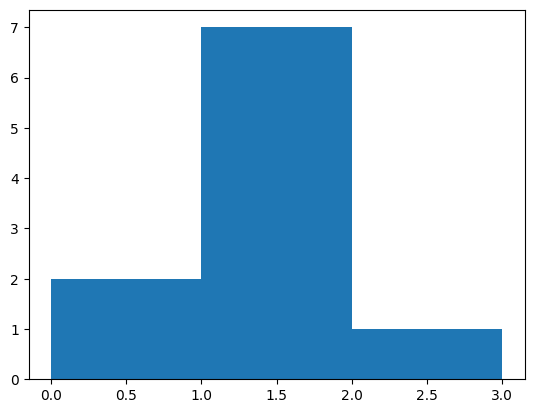

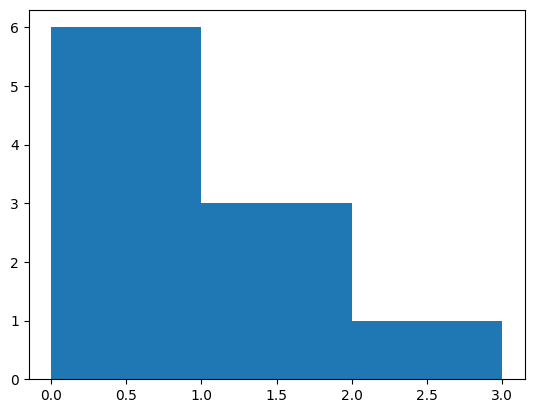

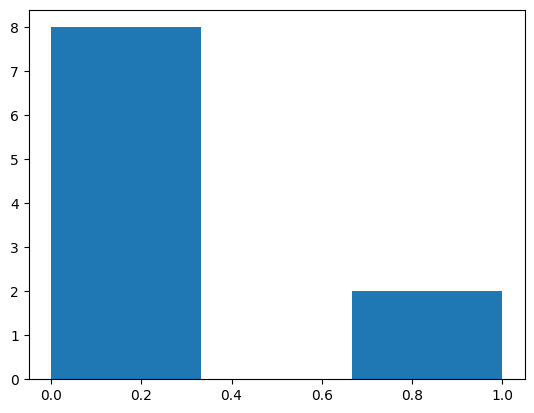

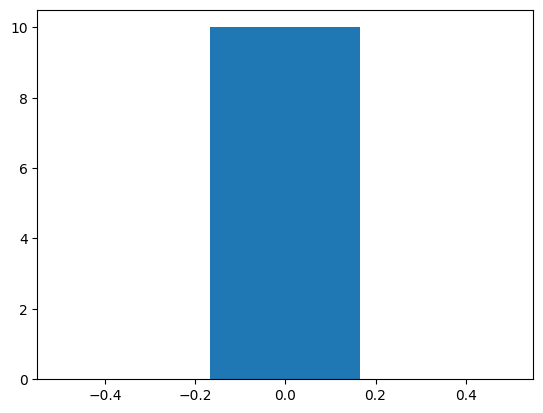

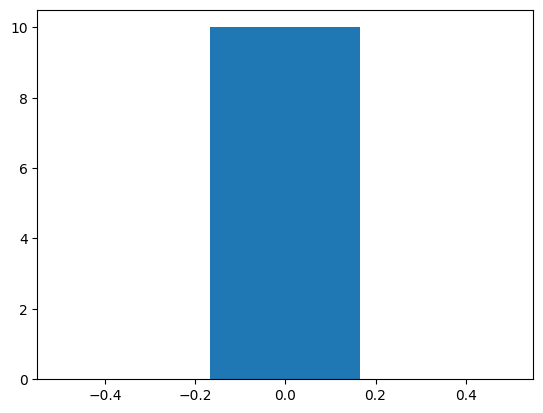

In [21]:
for t in range(20):
    plt.hist(binned[:,t], bins=3)
    plt.show()

In [26]:
from scipy.io import wavfile

def load_audio_file(file_path):
    # Read the audio file
    sample_rate, data = wavfile.read(file_path)
    
    # If stereo, convert to mono by averaging channels
    if len(data.shape) > 1:
        data = data.mean(axis=1)
    
    return sample_rate, data

# Example usage
file_path = "../crcns-student/data/all_stims/D54ABC42488F995C789F351A34316039.wav"
sample_rate, audio_data = load_audio_file(file_path)

print("Sample Rate:", sample_rate)
print("Audio Data Shape:", audio_data.shape)
print("First 10 samples:", audio_data[:10])

2000/32000

Sample Rate: 32000
Audio Data Shape: (55105,)
First 10 samples: [ 0 -2  0  2  0 -1  0  2  0 -1]


0.0625

In [24]:
32000/2000

16.0